In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_data_df = pd.read_csv("mouse_drug_data.csv")
#mouse_drug_data_df.head()

clinical_trial_data_df = pd.read_csv("clinicaltrial_data.csv")
#clinical_trial_data_df.head()
# Combine the data into a single dataset
combine_data = pd.merge(mouse_drug_data_df,clinical_trial_data_df, on="Mouse ID")


# Display the data table for preview

combine_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combine_data_grouped = combine_data.groupby(['Drug', 'Timepoint']).mean()["Tumor Volume (mm3)"]
#combine_data_grouped
#Convert to DataFrame
combine_data_grouped_df = pd.DataFrame(combine_data_grouped).reset_index()
# Preview DataFrame
combine_data_grouped_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
combine_data_grouped_df_sem = combine_data.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']
#print(combine_data_grouped_df_sem)
# Convert to DataFrame
population_sem_df = pd.DataFrame(combine_data_grouped_df_sem)

# Preview DataFrame

population_sem_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
population_sem_df = population_sem_df.reset_index()
population_sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
combine_data_grouped_df_reformatted = combine_data_grouped_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
# Preview that Reformatting worked
combine_data_grouped_df_reformatted.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
population_sem_df_pivot = population_sem_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']


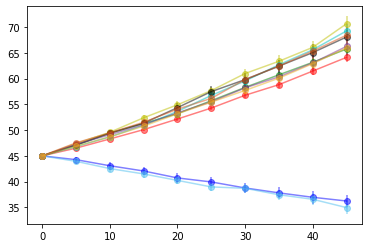

In [7]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

x_axis = combine_data_grouped_df_reformatted.index
y_axis = combine_data_grouped_df_reformatted["Capomulin"]
y_axis_1 =  combine_data_grouped_df_reformatted["Ceftamin"]
y_axis_2 = combine_data_grouped_df_reformatted["Infubinol"]
y_axis_3 = combine_data_grouped_df_reformatted["Ketapril"]
y_axis_4 = combine_data_grouped_df_reformatted["Naftisol"]
y_axis_5 = combine_data_grouped_df_reformatted["Placebo"]
y_axis_6 = combine_data_grouped_df_reformatted["Propriva"]
y_axis_7 = combine_data_grouped_df_reformatted["Ramicane"]
y_axis_8 = combine_data_grouped_df_reformatted["Stelasyn"]
y_axis_9 = combine_data_grouped_df_reformatted["Zoniferol"]

ax.errorbar(x_axis, y_axis, yerr=population_sem_df_pivot["Capomulin"], fmt="o", color="b",
                 alpha=0.5, label="Mean of Tumor", linestyle = "solid")
ax.errorbar(x_axis, y_axis_1, yerr=population_sem_df_pivot["Ceftamin"], fmt="o", color="r",
                 alpha=0.5, label="Mean of Tumor", linestyle = "solid")

ax.errorbar(x_axis, y_axis_2, yerr=population_sem_df_pivot["Infubinol"], fmt="o", color="g",
                 alpha=0.5, label="Mean of Tumor", linestyle = "solid")
ax.errorbar(x_axis, y_axis_3, yerr=population_sem_df_pivot["Ketapril"], fmt="o", color="y",
                 alpha=0.5, label="Mean of Tumor", linestyle = "solid")
ax.errorbar(x_axis, y_axis_4, yerr=population_sem_df_pivot["Naftisol"], fmt="o", color="c",
                 alpha=0.5, label="Mean of Tumor", linestyle = "solid")

ax.errorbar(x_axis, y_axis_5, yerr=population_sem_df_pivot["Placebo"], fmt="o", color="k",
                 alpha=0.5, label="Mean of Tumor", linestyle = "solid")
ax.errorbar(x_axis, y_axis_6, yerr=population_sem_df_pivot["Propriva"], fmt="o", color="#7E2F8E",
                 alpha=0.5, label="Mean of Tumor", linestyle = "solid")

ax.errorbar(x_axis, y_axis_7, yerr=population_sem_df_pivot["Ramicane"], fmt="o", color="#4DBEEE",
                 alpha=0.5, label="Mean of Tumor", linestyle = "solid")
ax.errorbar(x_axis, y_axis_8, yerr=population_sem_df_pivot["Stelasyn"], fmt="o", color="#D95319",
                 alpha=0.5, label="Mean of Tumor", linestyle = "solid")

ax.errorbar(x_axis, y_axis_9, yerr=population_sem_df_pivot["Zoniferol"], fmt="o", color="#EDB120",
                 alpha=0.5, label="Mean of Tumor", linestyle = "solid")

#ax.set_xlim(0, len(combine_data_grouped) + 1)

    # Save the Figure


plt.show()

In [8]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combine_data_msmean= combine_data.groupby(['Drug', 'Timepoint']).mean()["Metastatic Sites"]
# Convert to DataFrame
combine_data_msmean_df = pd.DataFrame(combine_data_msmean)
# Preview DataFrame
combine_data_msmean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
combine_data_msmean_sem = combine_data.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']
# Convert to DataFrame
combine_data_msmean_sem_df = pd.DataFrame(combine_data_msmean_sem)
# Preview DataFrame
combine_data_msmean_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
combine_data_msmean_df_reformatted = combine_data_msmean_df.unstack('Drug')
# Preview that Reformatting worked
combine_data_msmean_df_reformatted

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

In [12]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combine_data.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
#mice_count.head()
# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)
# Preview DataFrame
mice_count_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [14]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_df_reforamtted = mice_count_df.reset_index()
# Preview the Data Frame
mice_count_df_reforamtted.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
mice_count_df_reforamtted_pivot = mice_count_df_reforamtted.pivot(index='Timepoint', columns='Drug')['Mouse ID']
mice_count_df_reforamtted_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


AttributeError: 'Line2D' object has no property 'fmt'

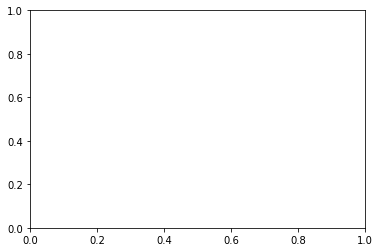

In [20]:


fig, ax = plt.subplots()
x_axis = mice_count_df_reforamtted_pivot.index
y_axis = mice_count_df_reforamtted_pivot["Capomulin"]/25*100
plt.plot(x_axis, y_axis, fmt="o",linestyle = "solid")
#y_axis_1 = mice_count_df_reforamtted_pivot["Ceftamin"]/25*100
#y_axis_2 = mice_count_df_reforamtted_pivot["Infubinol"]/25*100
#y_axis_3 = mice_count_df_reforamtted_pivot["Ketapril"]/25*100
#y_axis_4 = mice_count_df_reforamtted_pivot["Naftisol"]/25*100
#y_axis_5 = mice_count_df_reforamtted_pivot["Placebo"]/25*100
#y_axis_6 = mice_count_df_reforamtted_pivot["Propriva"]/26*100
#y_axis_7 = mice_count_df_reforamtted_pivot["Ramicane"]/25*100
#y_axis_8 = mice_count_df_reforamtted_pivot["Stelasyn"]/26*100
#y_axis_9 = mice_count_df_reforamtted_pivot["Zoniferol"]/25*100
plt.show()

In [18]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [33]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)